In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import pyproj

In [2]:
import geopandas as gpd
import os

In [3]:
#%matplotlib widget
%matplotlib inline

In [4]:
#Create local directory to store images
imgdir = 'rgi_data'
if not os.path.exists(imgdir):
    os.makedirs(imgdir)

In [5]:
data_dir = 'rgi_data'

In [6]:
%ls

baker_geojson.ipynb           LS8_final_april_2021/
baker_glacier_2021.jpg        LS8_final_july_2021/
baker_glacier.jpg             LS8_final_test/
baker_glacier.json            LS8_final_test_1/
final_2020.ipynb              rgi_data/
final_2021.ipynb              snotel_analysis-Copy1.ipynb
final_download.ipynb          snotel_analysis.ipynb
final_snotel_analysis.ipynb   snotel_conus_baker.json
final_snotel.ipynb            snotel_snwd_d_baker.pkl
final_workbook_1.ipynb        snotel_wteq_d_baker.pkl
glacier_download-Copy1.ipynb  Water_Poly2.cpg
glacier_download.ipynb        Water_Poly2.dbf
LS8_2020/                     Water_Poly2.prj
LS8_2021/                     Water_Poly2.shp
LS8_download_FINAL.ipynb      Water_Poly2.shx
LS8_final/


In [7]:
%cd rgi_data/

/home/jovyan/When-Glaciers-Were-Cool/final-project/rgi_data


In [12]:
!mkdir -p $data_dir
%cd $data_dir

/home/jovyan/When-Glaciers-Were-Cool/final-project/rgi_data


In [9]:
#!unzip 02_rgi60_WesternCanadaUS.zip

In [13]:
%cd ..

/home/jovyan/When-Glaciers-Were-Cool/final-project


In [14]:
rgi_gdf = gpd.read_file(f"{data_dir}/02_rgi60_WesternCanadaUS.shp")

In [15]:
rgi_gdf.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-02.00001,G238765E49002N,20049999,20069999,-121.235,49.0019,2,4,0.073,1938,...,345,304,0,0,0,0,0,9,None,"POLYGON ((-121.23718 49.00120, -121.23707 49.0..."
1,RGI60-02.00002,G238410E49162N,20049999,20069999,-121.590,49.1617,2,4,0.262,1726,...,6,817,0,0,0,0,0,9,None,"POLYGON ((-121.59118 49.15868, -121.59118 49.1..."
2,RGI60-02.00003,G238791E49163N,20049999,20069999,-121.209,49.1627,2,4,0.307,2002,...,100,478,0,0,0,0,0,9,None,"POLYGON ((-121.20751 49.16608, -121.20669 49.1..."
3,RGI60-02.00004,G238399E49166N,20049999,20069999,-121.601,49.1657,2,4,0.184,1563,...,15,376,0,0,0,0,0,9,None,"POLYGON ((-121.59654 49.16729, -121.59700 49.1..."
4,RGI60-02.00005,G238389E49167N,20049999,20069999,-121.611,49.1666,2,4,0.274,1668,...,50,676,0,0,0,0,0,9,None,"POLYGON ((-121.60800 49.16802, -121.60803 49.1..."


Area of interest coordinates:

            [-122.011416, 48.616138],
            [-121.593718, 48.616138],
            [-121.593718, 48.912002],
            [-122.011416, 48.912002],
            [-122.011416, 48.616138]
            
List of glaciers:

'Bastile Glacier WA', 'Boulder Glacier WA', 'Coleman Glacier WA', 'Deming Glacier WA', 'Easton Glacier WA', 'Hadley Glacier WA', 'Mazama Glacier WA', 'Park Glacier WA', 'Rainbow Glacier WA', 'Roosevelt Glacier WA', 'Sholes Glacier WA', 'Squak Glacier WA', 'Talum Glaciers WA', 'Thunder Glacier WA'

In [61]:
baker_poly = [Polygon(tuple(zip([-122.011416, -121.725, -121.725, -122.011416, -122.011416], 
                                [48.616138, 48.616138, 48.912002, 48.912002, 48.616138])))]

<AxesSubplot:>

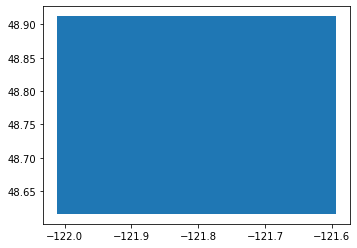

In [62]:
baker_gdf =  gpd.GeoDataFrame(geometry=baker_poly)
polygon_gdf.plot()

In [63]:
rgi_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
baker_gdf_proj = baker_gdf.set_crs(rgi_gdf.crs)

In [65]:
baker_gdf_proj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
rgi_baker_gdf = rgi_gdf[rgi_gdf.intersects(baker_gdf_proj.loc[0, 'geometry'])]

In [67]:
rgi_baker_gdf = rgi_baker_gdf[rgi_baker_gdf['Name'] != 'WA']

<AxesSubplot:>

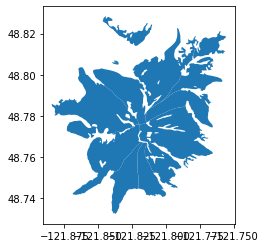

In [68]:
rgi_baker_gdf.plot()

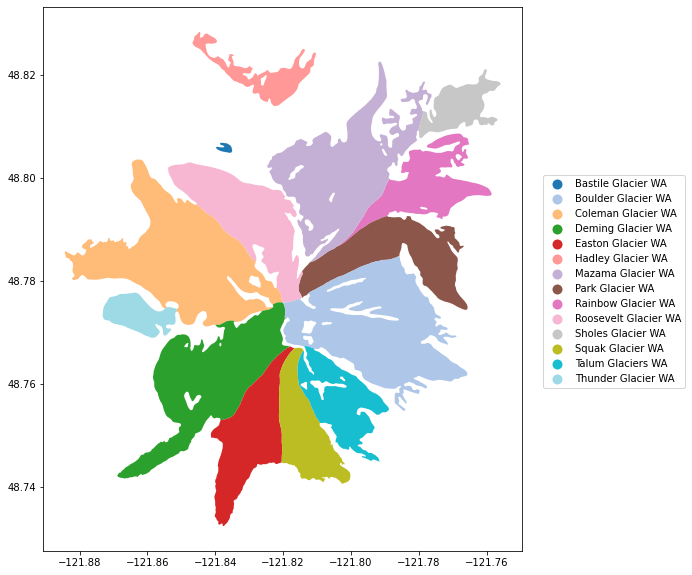

In [69]:
f, ax = plt.subplots(figsize=(10,10))
rgi_baker_gdf.plot(figsize=(8,8), cmap='tab20', ax=ax, column=rgi_baker_gdf.Name, legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.5, 0.2, 0.2))

In [73]:
json = 'rgi_baker.json'
if not os.path.exists(json):
    rgi_baker_gdf.to_file(json, driver='GeoJSON')

In [75]:
rgi_baker_gdf.Name

17284      Bastile Glacier WA
17286       Hadley Glacier WA
17732      Rainbow Glacier WA
17733         Park Glacier WA
17734    Roosevelt Glacier WA
17735      Coleman Glacier WA
17736      Thunder Glacier WA
17737       Deming Glacier WA
17738       Easton Glacier WA
17739        Squak Glacier WA
17740      Boulder Glacier WA
17741       Talum Glaciers WA
18773       Sholes Glacier WA
18774       Mazama Glacier WA
Name: Name, dtype: object